In [1]:
import mygdal
import myda
import numpy
import mynumpy
import myts

from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 10
plt.rcParams["text.usetex"] = False
plt.rcParams["font.weight"] = "normal"

doy = mygdal.Mygdal('/dados/d2/rolf/STACK/doy.tif')
ndvi = mygdal.Mygdal('/dados/d2/rolf/STACK/ndvi.tif')
# mygdal_doy = mygdal.Mygdal('C:/Users/Rolf/Downloads/STACK/doy.tif')
# mygdal_ndvi = mygdal.Mygdal('C:/Users/Rolf/Downloads/STACK/ndvi.tif')
# mygdal_evi = mygdal.Mygdal('C:/Users/Rolf/Downloads/STACK/evi.tif')

In [2]:
# This is a function that implements a Whittaker smoother in Python. 
# Reference: Paul H. C. Eilers. "A Perfect Smoother". Analytical Chemistry, 2003, 75 (14), pp 3631–3636.
# Source: https://gist.github.com/zmeri/3c43d3b98a00c02f81c2ab1aaacc3a49

import scipy
import scipy.sparse.linalg


def whittaker_smooth(y, lmda):
    m = len(y)
    E = scipy.sparse.identity(m)
    d1 = -1 * numpy.ones((m), dtype='d')
    d2 = 3 * numpy.ones((m), dtype='d')
    d3 = -3 * numpy.ones((m), dtype='d')
    d4 = numpy.ones((m), dtype='d')
    D = scipy.sparse.diags([d1, d2, d3, d4], [0, 1, 2, 3], shape=(m - 3, m), format="csr")
    z = scipy.sparse.linalg.cg(E + lmda * (D.transpose()).dot(D), y)
    return z[0]

In [11]:
raw_timeline = numpy.recfromcsv('../data/timeline_new2.csv')
timeline=myda.from_recarray(raw_timeline)
timeline

{
source: array([b'LT5', b'LE7', b'LE7', b'LT5', b'MOD', b'LE7', b'MOD', b'MOD',
       b'LE7', b'MOD', b'LE7', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'MOD', b'LE7', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5',
       b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT

In [ ]:
timeline = mydict.MyDict()
timeline['source'] = raw_timeline['source'].values
timeline['date'] = numpy.array(raw_timeline['date'].values, dtype='datetime64[D]')
timeline['base_date'] = numpy.array(raw_timeline['date'].values, dtype='datetime64[Y]')

def timeline_pixel_dates(timeline, pixel, mygdal_doy, factor_value=1.0):
    raw_doys = mygdal_doy.read_pixel(pixel, factor_value=factor_value, min_value=0, max_value=366)
    bad_doys = numpy.isnan(raw_doys)
    raw_doys[bad_doys] = 0.
    doys = numpy.array(raw_doys, dtype='timedelta64[D]')
    return timeline['base_date'] + doys

raw_timeline = None

{
source: array([b'LT5', b'LE7', b'LE7', b'LT5', b'MOD', b'LE7', b'MOD', b'MOD',
       b'LE7', b'MOD', b'LE7', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'MOD', b'LE7', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5',
       b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7',
       b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LT5', b'MOD',
       b'LE7', b'LT5', b'MOD', b'LE7', b'LT5', b'MOD', b'LE7', b'LT

In [7]:
head(timeline)

{
source: [ 'LT5' 'LE7' 'LE7' 'LT5' 'MOD' ...] 
date: [ '2000-01-10' '2000-01-18' '2000-02-03' '2000-02-11' '2000-02-19' ...] 
base_date: [ '2000' '2000' '2000' '2000' '2000' ...] 
}


In [8]:
raw_samples = pandas.read_csv('../data/samples_new2.csv')
samples = {}
samples['longitude'] = raw_samples['longitude'].values
samples['latitude'] = raw_samples['latitude'].values
samples['from'] = numpy.array(raw_samples['from'].values, dtype='datetime64[D]')
samples['to'] = numpy.array(raw_samples['to'].values, dtype='datetime64[D]')
samples['label'] = raw_samples['label'].values
samples['point'] = numpy.array([samples['longitude'], samples['latitude']]).T

samples_timeline = (timeline, mygdal_doy, 100000.0)

raw_samples = None

In [9]:
sort(samples, by='latitude', descending=True)

In [10]:
pixels = mygdal_doy.geolocs_to_pixels(samples['point'])
head(pixels)

[ [ 74 20 ] [ 205 21 ] [ 213 21 ] [ 72 28 ] [ 80 28 ] ...] 

In [11]:
raw_doys = mygdal_doy.read_pixel(pixels[0], factor_value=100000, min_value=0, max_value=366)
good_doys = ~numpy.isnan(raw_doys)
raw_doys[~good_doys] = 0.0
len(raw_doys), len(good_doys)

(986, 986)

In [12]:
doys = numpy.array(raw_doys, 'timedelta64[D]')
base_dates = timeline['base_date']
len(doys), len(base_dates)

(986, 986)

In [13]:
pixel_dates = base_dates + doys
head(pixel_dates)

[ '2000-01-01' '2000-01-18' '2000-02-03' '2000-01-01' '2000-01-01' ...] 

In [14]:
raw_ndvis = mygdal_ndvi.read_pixel(pixels[0], factor_value=10, min_value=-1, max_value=1)
good_ndvis = ~numpy.isnan(raw_ndvis)
ndvis_dates = pixel_dates[good_ndvis]
ndvis = raw_ndvis[good_ndvis]
len(ndvis_dates), len(ndvis)

(387, 387)

In [15]:
ndvis_argsort = numpy.argsort(ndvis_dates)
ndvis_dates = ndvis_dates[ndvis_argsort]
ndvis = ndvis[ndvis_argsort]
ndvis_ts = ts_new(ndvis_dates, ndvis)
head(ndvis_ts)

(
[ '2000-01-18' '2000-02-03' '2000-02-26' '2000-03-08' '2000-03-22' ...] 
[ 0.6301000000000001 0.69740000000000013 0.58940000000000003 0.49370000000000003 0.42910000000000004 ...] 
)


In [16]:
head(timeline['source'][good_ndvis])

[ 'LE7' 'LE7' 'LE7' 'MOD' 'MOD' ...] 

In [17]:
head(samples)

{
label: [ 'Soybean-maize' 'Cotton-fallow' 'Cotton-fallow' 'Soybean-maize' 'Soybean-maize' ...] 
point: [ [ 611007.86624535604 -1325491.78547118 ] [ 614950.01863124198 -1325506.6182283999 ] [ 615181.91125486302 -1325507.5068682199 ] [ 610959.94890303293 -1325722.0157840599 ] [ 611191.83905921096 -1325722.8737497199 ] ...] 
longitude: [ 611007.86624535604 614950.01863124198 615181.91125486302 610959.94890303293 611191.83905921096 ...] 
latitude: [ -1325491.78547118 -1325506.6182283999 -1325507.5068682199 -1325722.0157840599 -1325722.8737497199 ...] 
from: [ '2010-09-01' '2011-09-01' '2011-09-01' '2010-09-01' '2010-09-01' ...] 
to: [ '2011-09-01' '2012-09-01' '2012-09-01' '2011-09-01' '2011-09-01' ...] 
}


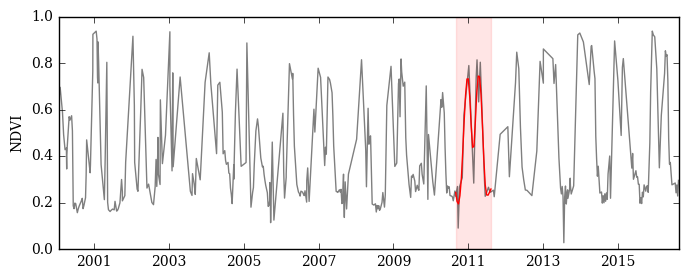

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(*ndvis_ts, color='black', alpha=0.5)
sample_ts = ts_between(ndvis_ts, samples['from'][0], samples['to'][0], include_extrems=False)
ndvis_ts_reg = ts_smooth(ts_regular(sample_ts, n=26))
plt.plot(*ndvis_ts_reg, color='red', alpha=1.0)
plt.fill_between(ts_index(sample_ts), 0, 1, color='red', alpha=0.1)
plt.ylabel('NDVI')
plt.show()

In [19]:
def pixel_measure_ts(pixel, mygdal_measure, factor_value, min_value, max_value, 
                     timeline, mygdal_doy, factor_doy):
    raw_index = timeline_pixel_dates(timeline, pixel, mygdal_doy, factor_value=factor_doy)
    raw_values = mygdal_measure.read_pixel(pixel, factor_value=factor_value, min_value=min_value, max_value=max_value)
    good_values = ~numpy.isnan(raw_values)
    index = raw_index[good_values]
    values = raw_values[good_values]
    return ts_groupby(ts_new(index, values), numpy.mean)

def samples_measure_ts(samples, mygdal_measure, factor_value, min_value, max_value, 
                       include_extrems=False, return_index_doy=False):
    pixels = mygdal_measure.geolocs_to_pixels(samples['point'])
    for i in range(len(samples['point'])):
        raw_ts = pixel_measure_ts(pixels[i], mygdal_measure, factor_value, min_value, max_value, *samples_timeline)
        if return_index_doy:
            raw_ts = ts_index_doy(raw_ts, base_date=samples['from'][i])
            yield ts_between(raw_ts, doy_index(samples['from'][i]), 
                             doy_index(samples['to'][i], base_date=samples['from'][i]), include_extrems)
        else:
            yield ts_between(raw_ts, samples['from'][i], samples['to'][i], include_extrems)

def samples_measure_reg_ts(samples, mygdal_measure, factor_value, min_value, max_value, slices, 
                           smooth=False, return_index_doy=False):
    if return_index_doy:
        new_index = doy_index(linspace_index(samples['from'][0], samples['to'][0], slices), base_date=samples['from'][0])
    else:
        new_index = linspace_index(samples['from'][0], samples['to'][0], slices)
    for ts in samples_measure_ts(samples, mygdal_measure, factor_value, min_value, max_value, include_extrems=True,
                                return_index_doy=return_index_doy):
        if smooth:
            yield ts_smooth(ts_regular(ts, index=new_index), 1.0)
        else:
            yield ts_regular(ts, index=new_index)

In [20]:
sample_interval = ts_between_args(ndvis_ts_reg, samples['from'][0], samples['to'][0])
len(ts_index(ndvis_ts_reg)[sample_interval])

26

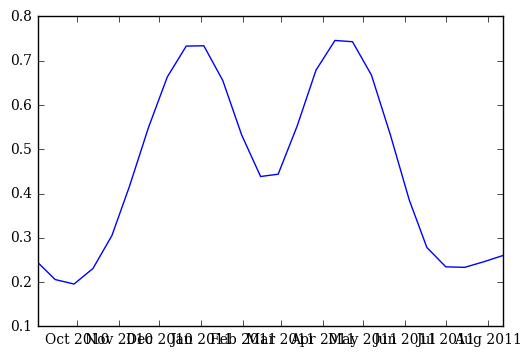

In [21]:
plt.plot(*ts_between(ndvis_ts_reg, samples['from'][0], samples['to'][0]))
plt.show()

In [22]:
pixels = mygdal_doy.geolocs_to_pixels(where(samples, label='Soybean-cotton')['point'])
head(pixels)

[ [ 173 28 ] [ 181 28 ] [ 188 28 ] [ 179 36 ] [ 187 36 ] ...] 

In [37]:
samples_ts_reg = list(samples_measure_reg_ts(samples=where(samples, label='Soybean-maize'), mygdal_measure=mygdal_ndvi,
                                             factor_value=10, min_value=-1, max_value=1, slices=42, 
                                             smooth=True, return_index_doy=True))

In [30]:
head(samples_ts_reg)

[ (
[ 0.0 8.0 17.0 26.0 35.0 ...] 
[ 0.21782935998506694 0.1907981418614958 0.17572124510898265 0.17392150627063616 0.19126750529886036 ...] 
)
(
[ 0.0 8.0 17.0 26.0 35.0 ...] 
[ 0.21854514717411747 0.20127747721561959 0.18899053690148859 0.18347228628417372 0.1921190351982395 ...] 
)
(
[ 0.0 8.0 17.0 26.0 35.0 ...] 
[ 0.24216539548966354 0.21712395454372102 0.19986984878281716 0.19336592381119924 0.20432415851268354 ...] 
)
(
[ 0.0 8.0 17.0 26.0 35.0 ...] 
[ 0.22601652095299304 0.18947709558195486 0.17210834121262442 0.17866520072182723 0.21639955438893524 ...] 
)
(
[ 0.0 8.0 17.0 26.0 35.0 ...] 
[ 0.22445461270213796 0.18965462267211317 0.17405324429036811 0.18245521697412584 0.22167432581178712 ...] 
)
...] 

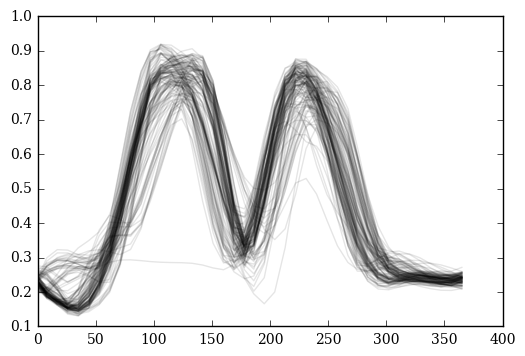

In [38]:
for ts in samples_ts_reg:
    plt.plot(*ts, color='black', alpha=0.1)
plt.show()

In [279]:
# Source: http://alexminnaar.com/time-series-classification-and-clustering-with-python.html

# def LB_Keogh(s1,s2,r):
#     LB_sum=0
#     for ind,i in enumerate(s1):
#         lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
#         upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
#         if i>upper_bound:
#             LB_sum=LB_sum+(i-upper_bound)**2
#         elif i<lower_bound:
#             LB_sum=LB_sum+(i-lower_bound)**2
#     return sqrt(LB_sum)

# def DTW_distance_win(s1, s2, w, dist_func=lambda x, y: abs(x - y)):
#     DTW={}
#     w = max(w, abs(len(s1) - len(s2)))
#     for i in range(-1, len(s1)):
#         for j in range(-1, len(s2)):
#             DTW[(i, j)] = float('inf')
#     DTW[(-1, -1)] = 0
#     for i in range(len(s1)):
#         for j in range(max(0, i - w), min(len(s2), i + w)):
#             dist = dist_func(s1[i], s2[j])
#             DTW[(i, j)] = dist + min(DTW[(i - 1, j)],DTW[(i, j - 1)], DTW[(i - 1, j - 1)])
#     return DTW[len(s1) - 1, len(s2) - 1]

# def DTW_distance_triangle_matrix(tss_reg, dtw_window, dist_func=lambda x, y: abs(x - y)):
#     result = []
#     for i in range(len(tss_reg) - 1):
#         for j in range(i + 1, len(tss_reg)):
#             result.append(DTW_distance_win(ts_values(tss_reg[i]), ts_values(tss_reg[j]), dtw_window, dist_func))
#     return result

In [39]:
def logistic(x, alpha, beta):
    return 1.0 / (1.0 + numpy.exp(-alpha * (x - beta)))

def cross_distances(a, b, func, *func_params):
    s0, s1 = numpy.meshgrid(a, b)
    return func(numpy.abs(s0 - s1), *func_params)

def DTW_prepare(len1, len2):
    return numpy.zeros((len1 + 1, (len2 + 1)))

def DTW(dists, window=None, result=None):
    if window is None or window > len(dists):
        window = len(dists)
    if result is None:
        result = numpy.zeros((len(dists) + 1, (len(dists) + 1)))
    result[:,:] = numpy.inf
    result[0, 0] = 0.0
    for i in range(1, len(result)):
        for j in range(max(1, i - window), min(len(result[i]), i + window + 1)):
            result[i, j] = numpy.nanmin(result[i-1:i+1, j-1:j+1]) + dists[i-1, j-1]
    return result

def DTW_dist_reg_tss(tss_reg, window, dist_func, index_params, value_params):
    result = []
    dtw_dists = DTW_prepare(len(ts_index(tss_reg[0])), len(ts_index(tss_reg[0])))
    index_dist = cross_distances(ts_index(tss_reg[0]), ts_index(tss_reg[0]), logistic, *index_params) 
    for i in range(len(tss_reg) - 1):
        for j in range(i + 1, len(tss_reg)):
            ndvi_dist = cross_distances(ts_values(tss_reg[i]), ts_values(tss_reg[j]), logistic, *value_params)
            DTW(index_dist + ndvi_dist, window=window, result=dtw_dists)
            result.append(dtw_dists[-1, -1])
    return result

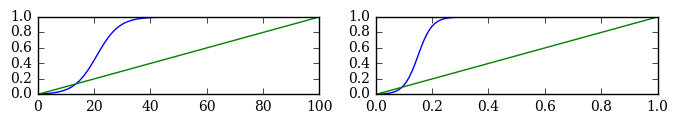

In [40]:
index_params = (0.25, 21) # doy
value_params = (40, 0.15)

x = numpy.arange(0, 100, 1)
fig = plt.figure(figsize=(8,1))
s = fig.add_subplot(1, 2, 1)
s.plot(x, [logistic(i, *index_params) for i in x])
s.plot(x, x / 100)
x = numpy.arange(0, 1, 0.01)
s = fig.add_subplot(1, 2, 2)
s.plot(x, [logistic(i, *value_params) for i in x])
s.plot(x, x)
plt.show()

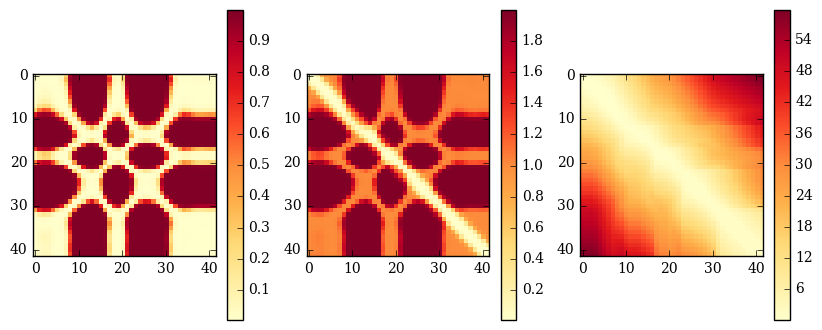

In [41]:
index_dist = cross_distances(ts_index(samples_ts_reg[1]), ts_index(samples_ts_reg[2]), logistic, *index_params) 
ndvi_dist = cross_distances(ts_values(samples_ts_reg[1]), ts_values(samples_ts_reg[2]), logistic, *value_params)
# evi_dist = cross_distances(ts_values(samples_ts_reg[0]), ts_values(samples_ts_reg[10]), logistic, *value_params)

dtw_dists = None
dtw_dists = DTW_prepare(len(ts_index(samples_ts_reg[0])), len(ts_index(samples_ts_reg[0])))
dtw_dists = DTW(index_dist + ndvi_dist, result=dtw_dists)

fig = plt.figure(figsize=(10,4))
s = fig.add_subplot(1, 3, 1)
im = s.imshow(ndvi_dist, cmap='YlOrRd', interpolation='nearest')
fig.colorbar(im)
s = fig.add_subplot(1, 3, 2)
im = s.imshow(index_dist+ndvi_dist, cmap='YlOrRd', interpolation='nearest')
fig.colorbar(im)
s = fig.add_subplot(1, 3, 3)
im = s.imshow(dtw_dists[1:,1:], cmap='YlOrRd', interpolation='nearest')
fig.colorbar(im)
#print(dtw_dists[-1,-1])
#plt.xlabel('DTW distance')
#plt.ylabel('DTW distance')
plt.show()

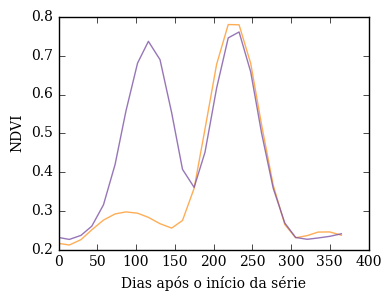

In [49]:
plt.figure(figsize=(4, 3))

pick_samples = [3, 45]
colors = pick_colors('Paired', samples['label'], include_extrems=True)

for i in pick_samples:
    plt.plot(*samples_ts_reg[i], color=colors[samples['label'][i]], linewidth=1, alpha=0.8)
plt.xlabel('Dias após o início da série')
plt.ylabel('NDVI')
plt.show()

In [50]:
dtw_dist_triangle = DTW_dist_reg_tss(tss_reg=samples_ts_reg, window=2, dist_func=logistic, 
                                     index_params=index_params, value_params=value_params)
head(dtw_dist_triangle)

[ 0.9458704122069781 1.0486510150743364 6.7891799033006892 0.89552736425486945 0.7263866935213763 ...] 

In [51]:
print('index_params {}'.format(repr(index_params)), 'values_params {}'.format(repr(value_params)))

index_params (0.25, 21) values_params (40, 0.15)


In [592]:
numpy.savetxt('../data/dtw_distances/twdtw_w2_logit_Soybean-maize.txt', dtw_dist_triangle, delimiter=',', 
              header='triangle_matrix',
              comments='#index_params {} values_params {}\n'.format(repr(index_params), repr(value_params)))

In [52]:
Z = linkage(dtw_dist_triangle, 'single')

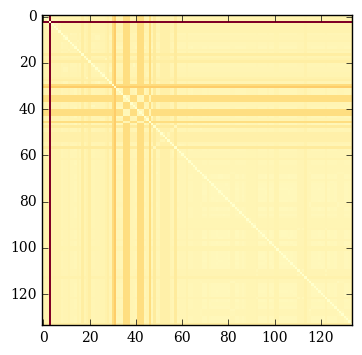

In [53]:
from scipy.cluster.hierarchy import cophenet

cophenet_matrix = distance.squareform(cophenet(Z))
plt.imshow(cophenet_matrix, cmap='YlOrRd', interpolation='nearest')
plt.show()

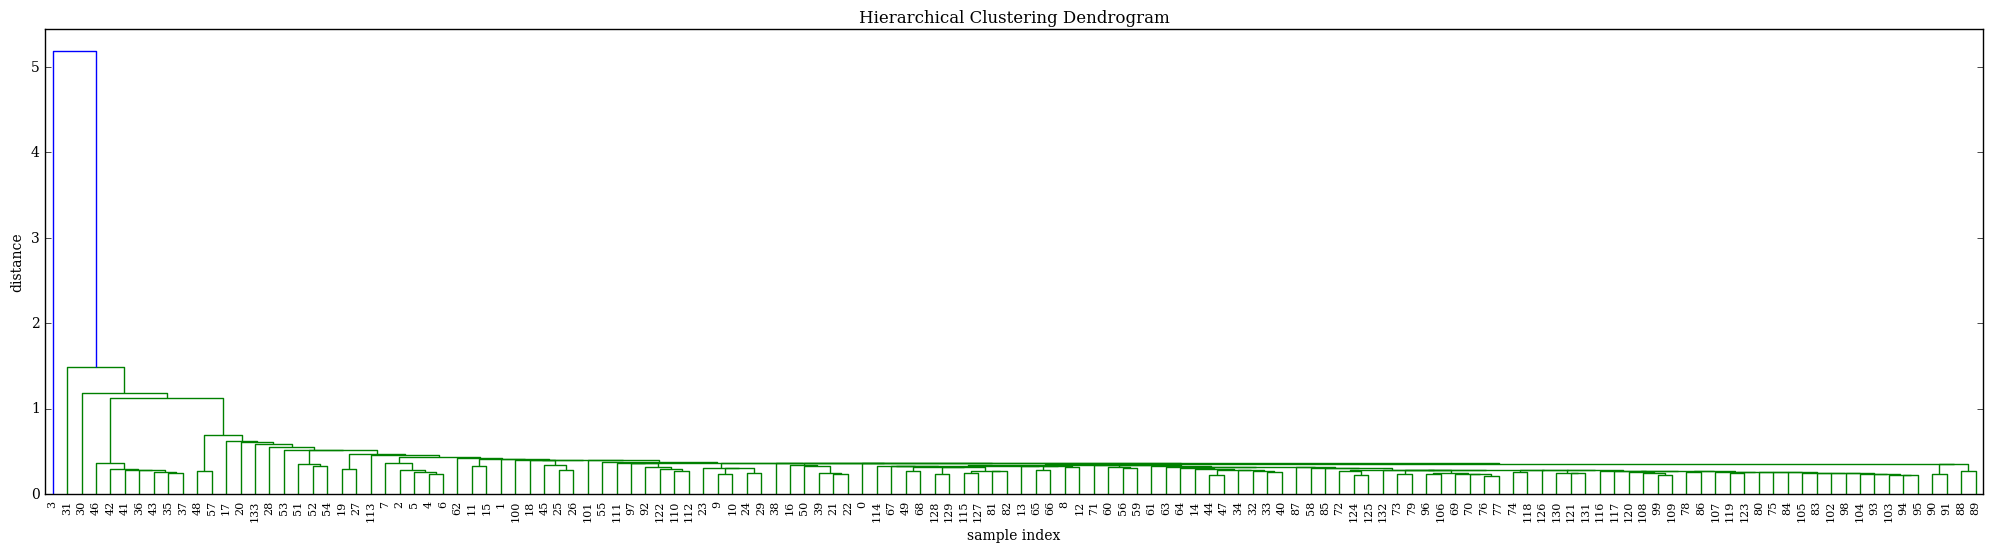

In [54]:
plt.figure(figsize=(25, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

[ 0.39777366  0.39829822  0.40125042  0.40647166  0.4094452   0.42113405
  0.43110652  0.45296239  0.4668388   0.51968114  0.52135487  0.5571377
  0.58938711  0.60564713  0.62150382  0.68901153  1.12407406  1.18576814
  1.49045416  5.18182246]


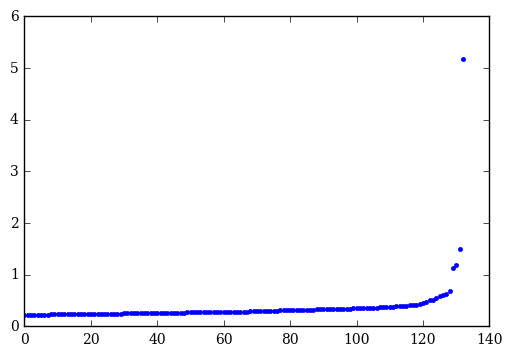

In [56]:
# last distances
print(Z[-20:,2])
plt.plot(Z[:,2], '.')
plt.show()

In [57]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

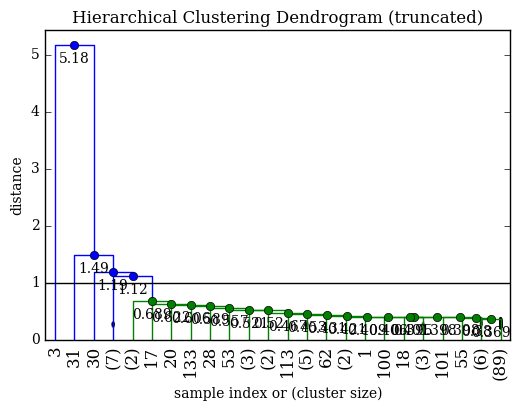

In [66]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=24,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=0.35,
    max_d=1.0
)
plt.show()

In [67]:
from scipy.cluster.hierarchy import fcluster

max_d = 1.0
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

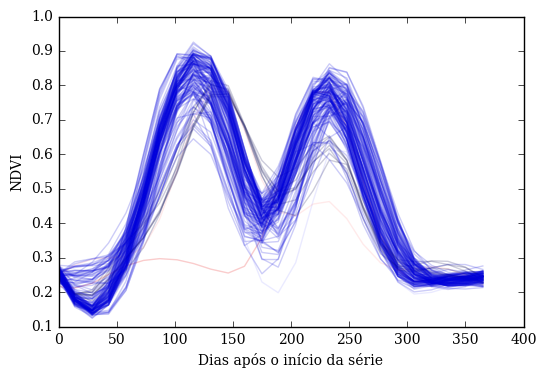

In [68]:
colors = pick_colors('seismic', clusters, include_extrems=True)

for i in range(len(samples_ts_reg)):
    plt.plot(*samples_ts_reg[i], color=colors[clusters[i]], linewidth=1, alpha=0.2)
plt.xlabel('Dias após o início da série')
plt.ylabel('NDVI')
plt.show()

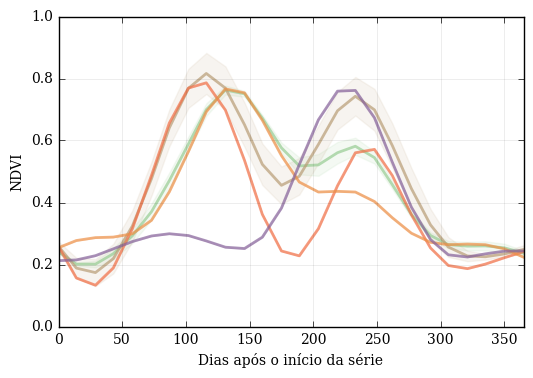

In [69]:
def tss_new(list_ts_reg):
    result = {}
    result['index'] = ts_index(list_ts_reg[0])
    result['values'] = numpy.zeros((len(list_ts_reg), len(ts_index(list_ts_reg[0]))))
    for i in range(len(list_ts_reg)):
        result['values'][i] = ts_values(list_ts_reg[i])
    return result

samples_tss = tss_new(samples_ts_reg)


colors = pick_colors('Paired', clusters)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
x = samples_tss['index']

for i in range(max(clusters)):
    y = whittaker_smooth(samples_tss['values'][clusters==i + 1].mean(axis=0), 1.0)
    error = whittaker_smooth(samples_tss['values'][clusters==i + 1].std(axis=0), 1.0)

    plt.fill_between(x, y - error, y + error, color=colors[i + 1], alpha=0.1)
    plt.plot(x, y, color=colors[i + 1], linewidth=2, alpha=0.7)

plt.xlim([min(samples_tss['index']), max(samples_tss['index'])]) 
plt.ylim([0, 1]) 
plt.xlabel('Dias após o início da série')
plt.ylabel('NDVI')
plt.show()

**All samples**

In [70]:
samples_ts_reg_all = list(samples_measure_reg_ts(samples=samples, mygdal_measure=mygdal_ndvi,
                                                 factor_value=10, min_value=-1, max_value=1, slices=26, 
                                                 smooth=True, return_index_doy=True))

In [71]:
dtw_dist_triangle_all = DTW_dist_reg_tss(tss_reg=samples_ts_reg_all, window=2, dist_func=logistic,
                                         index_params=index_params, value_params=value_params)
head(dtw_dist_triangle_all)

[ 9.3319426323862587 9.8773588796278275 0.9458704122069781 1.0486510150743364 6.7891799033006892 ...] 

In [102]:
#dtw_dist_triangle_all = numpy.loadtxt('../data/dtw_distances/dtw_dist_w2_logit_all.txt', delimiter=',', skiprows=0)

In [611]:
numpy.savetxt('../data/dtw_distances/twdtw_w2_logit_all.txt', dtw_dist_triangle_all, delimiter=',', 
              header='triangle_matrix',
              comments='#index_params {} values_params {}\n'.format(repr(index_params), repr(value_params)))

In [612]:
Z_all = linkage(dtw_dist_triangle_all, 'single')

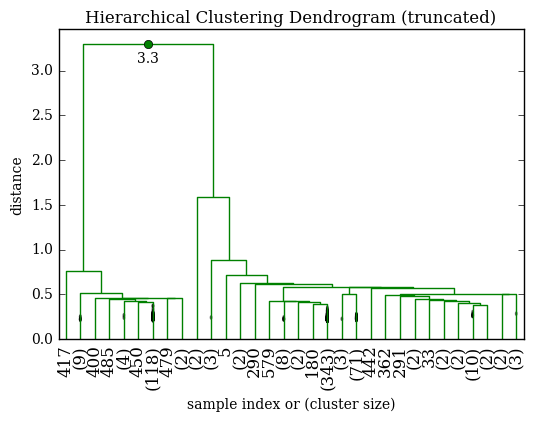

In [613]:
fancy_dendrogram(
    Z_all,
    truncate_mode='lastp',
    p=32,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=6.4
)
plt.show()

In [614]:
max_d = 0.6
clusters_all = fcluster(Z_all, max_d, criterion='distance')

In [25]:
samples_tss_all = tss_new(samples_ts_reg_all)

colors = pick_colors('jet', clusters_all, False)

for i in range(len(samples_ts_reg_all)):
    plt.plot(*samples_ts_reg_all[i], color=colors[clusters_all[i]], linewidth=1, alpha=0.2)
plt.xlim([min(samples_tss_all['index']), max(samples_tss_all['index'])]) 
plt.ylim([0, 1]) 
plt.show()

NameError: name 'tss_new' is not defined

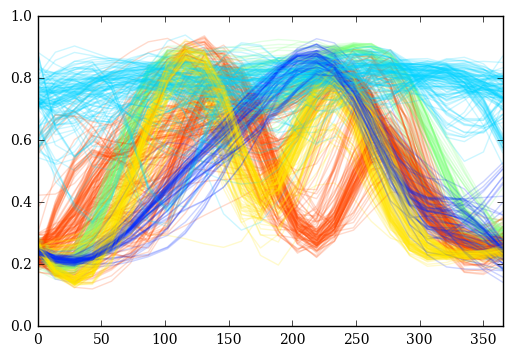

In [180]:
#labels = {}
#for i, value in enumerate(numpy.unique(samples['label'])):
#    labels[value] = i
colors = pick_colors('jet', samples['label'])
for i in range(len(samples_ts_reg_all)):
    plt.plot(*samples_ts_reg_all[i], color=colors[samples['label'][i]], linewidth=1, alpha=0.2)
plt.xlim([min(samples_tss_all['index']), max(samples_tss_all['index'])]) 
plt.ylim([0, 1]) 
plt.xlabel('Dias após o início da série')
plt.ylabel('NDVI')
plt.show()

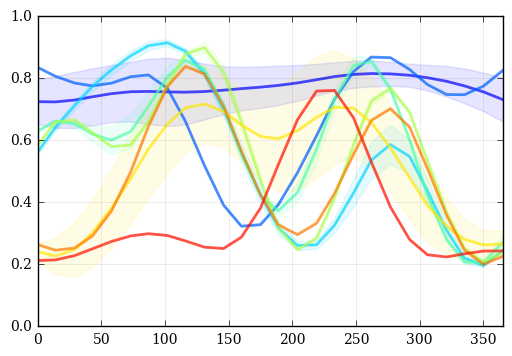

In [616]:
colors = pick_colors('jet', clusters_all)

plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)

x = samples_tss_all['index']
legends = []
for i in range(max(clusters_all)):
    y = whittaker_smooth(samples_tss_all['values'][clusters_all==i + 1].mean(axis=0), 1.0)
    error = whittaker_smooth(samples_tss_all['values'][clusters_all==i + 1].std(axis=0), 1.0)
    plt.fill_between(x, y - error, y + error, color=colors[i + 1], alpha=0.1)
    plt.plot(x, y, color=colors[i + 1], linewidth=2, alpha=0.7)
    legends.append('cluster_{}'.format(str(i + 1)))

#plt.legend(legends, loc='best')
plt.xlim([min(samples_tss_all['index']), max(samples_tss_all['index'])]) 
plt.ylim([0, 1]) 

plt.show()

In [617]:
labels = {}
for i, value in enumerate(numpy.unique(samples['label'])):
    labels[value] = i
confusion = numpy.zeros((max(clusters_all), len(labels)))
for i in range(len(samples['label'])):
    confusion[clusters_all[i] - 1][labels[samples['label'][i]]] += 1
confusion

array([[   0.,  137.,    0.,    0.,    0.],
       [   0.,    1.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    2.],
       [   0.,    0.,    0.,    0.,    3.],
       [   0.,    0.,    0.,    0.,    2.],
       [  68.,    0.,   79.,  133.,  176.],
       [   0.,    0.,    0.,    0.,    1.],
       [   0.,    0.,    0.,    1.,    0.]])

In [212]:
head(labels)

{
Forest: 1 
Cotton-fallow: 0 
Soybean-maize: 3 
Soybean-cotton: 2 
Soybean-millet: 4 
}


In [618]:
clusters_all

array([6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6,

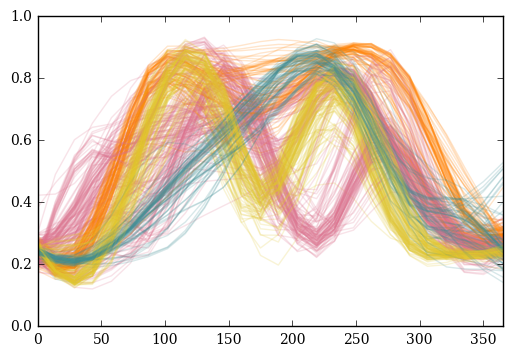

In [620]:
colors = pick_colors('Set1', samples['label'])
#colors = pick_colors('Set1', clusters_all)
for i in range(len(samples_ts_reg_all)):
    if clusters_all[i] == 6:
    #if samples['label'][i] == 'Soybean-cotton':
        plt.plot(*samples_ts_reg_all[i], color=colors[samples['label'][i]], linewidth=1, alpha=0.2)
        #plt.plot(*samples_ts_reg_all[i], color=colors[clusters_all[i]], linewidth=1, alpha=0.2)

plt.xlim([min(samples_tss_all['index']), max(samples_tss_all['index'])]) 
plt.ylim([0, 1]) 
plt.show()

In [305]:
confusion_lin = confusion[:]
for i in range(len(confusion)):
    confusion_lin[i] /= numpy.sum(confusion[i])
confusion_lin

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0. 

In [306]:
confusion_col = confusion[:]
for i in range(len(confusion)):
    confusion_col[i] /= numpy.sum(confusion, axis=0)
confusion_col

array([[ 0.        ,  0.09090909,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.0990991 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.10881383,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.12049903,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.13478322,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.15257615,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.17523322,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.20483771,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.24469313,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.30017009,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.37999485,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.14687495],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.16791517],
       [ 0.        ,  0.        ,  0. 

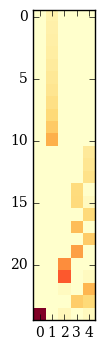

In [303]:
plt.imshow(confusion_col, cmap='YlOrRd', interpolation='nearest')
plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=1)
plt.show()